In [1]:
%pylab inline
import ROOT
import pandas as pd
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyAmsUtils import *

In [3]:
data = []
tfile = None
for fileName in glob.glob("/data/deut*"):
    tfile = ROOT.TFile(fileName)
    tree = tfile.Get("selections")
    data.append(tree_to_frame(tree))
    print fileName
data = pd.concat(data)
bitNames = str(tfile.Get("infos/selectionBits").GetString()).split(',')

/data/deuteronMC.ntuple1.root
/data/deuteronMC.ntuple3.root
/data/deuteronMC.ntuple2.root


In [23]:
selData = {}
for n,name in enumerate(bitNames):
     selData[name] = np.bitwise_and(data["selStatus"],1<<n) != 0
selData = pd.DataFrame(selData)

(0, 1.01)

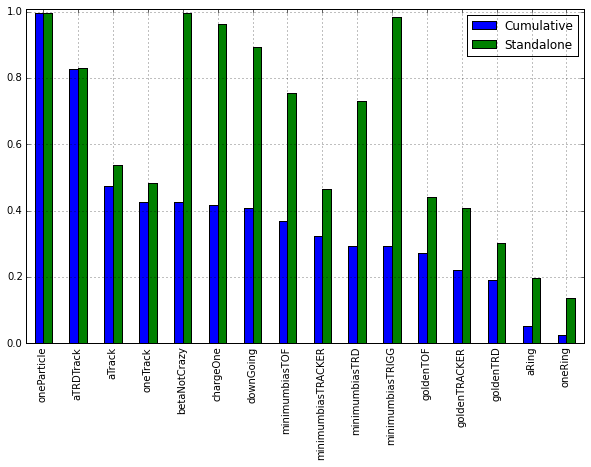

In [54]:
figsize(10,6)
order = ['oneParticle', 'aTRDTrack', 'aTrack' ,'oneTrack', 
         u'betaNotCrazy', u'chargeOne', u'downGoing',
         'minimumbiasTOF', 'minimumbiasTRACKER', 'minimumbiasTRD', 'minimumbiasTRIGG',
         'goldenTOF', 'goldenTRACKER', 'goldenTRD', 'aRing', 'oneRing']
current = None
effCum = {}
effStand = {}
for c in order:
    effStand[c] = selData[c].mean()
    if current is None: current = selData[c]
    current &= selData[c]
    effCum[c] = current.mean()
pd.DataFrame({
    "Standalone": pd.Series(effStand, index=order),
    "Cumulative": pd.Series(effCum, index=order)
}).plot(kind='bar')
ylim(0,1.01)

(0, 1.01)

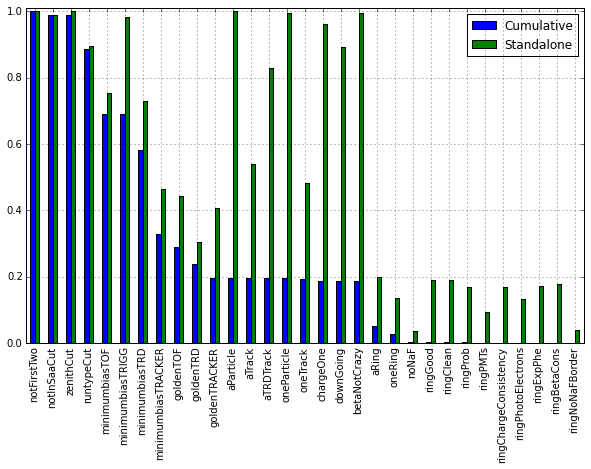

In [53]:
figsize(10,6)
order =bitNames
current = None
effCum = {}
effStand = {}
for c in order:
    effStand[c] = selData[c].mean()
    if current is None: current = selData[c]
    current &= selData[c]
    effCum[c] = current.mean()
pd.DataFrame({
    "Standalone": pd.Series(effStand, index=order),
    "Cumulative": pd.Series(effCum, index=order)
}).plot(kind='bar')
ylim(0,1.01)